## Demonstrate K-Means Concept with Simulated Data ##

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets.samples_generator import make_blobs 

X, y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 0)


Plot some "blobs" of data that we have generated:

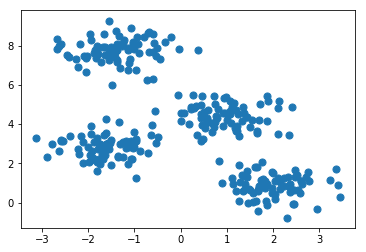

In [30]:
import matplotlib.pyplot as plt
plt.scatter( X[:, 0], X[:, 1], s = 50);

Clearly there are four clusters - lets try to identify them programatically with K-Means

## Identify Clusters of Data using K-Means ##
For a given number of clusters, find the centers as defined by Euclidian distance and separate points into groups based by their nearest center.

In [40]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters = 4) # we have guessed the number of clusters (kind of cheating)
kmeans.fit(X) 
y_kmeans = kmeans.predict(X)


In [41]:
y_kmeans

array([1, 0, 3, 0, 1, 1, 2, 3, 0, 0, 2, 0, 3, 0, 1, 3, 3, 1, 2, 2, 1, 1,
       3, 2, 2, 3, 1, 3, 2, 3, 0, 0, 3, 0, 0, 0, 0, 0, 2, 1, 3, 2, 3, 3,
       2, 2, 0, 2, 0, 1, 2, 1, 0, 1, 1, 2, 0, 2, 0, 1, 0, 3, 0, 2, 2, 2,
       0, 1, 0, 2, 3, 2, 0, 2, 2, 0, 2, 3, 1, 0, 1, 3, 1, 1, 0, 3, 1, 3,
       0, 0, 3, 1, 0, 2, 2, 3, 1, 1, 3, 2, 0, 1, 0, 1, 3, 1, 1, 3, 0, 3,
       2, 2, 1, 0, 1, 3, 0, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2,
       2, 1, 0, 2, 2, 0, 3, 0, 0, 2, 3, 2, 3, 2, 0, 3, 0, 0, 0, 3, 0, 3,
       1, 2, 0, 2, 1, 3, 0, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 0, 1, 3, 2, 0,
       1, 1, 3, 2, 1, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 2, 3, 3, 2, 2, 2, 3,
       2, 0, 3, 2, 1, 2, 3, 0, 2, 0, 3, 0, 3, 2, 3, 3, 0, 2, 2, 1, 1, 3,
       0, 1, 1, 2, 1, 2, 3, 0, 0, 3, 3, 0, 3, 1, 2, 3, 1, 2, 0, 2, 1, 3,
       1, 0, 0, 0, 0, 2, 2, 0, 3, 2, 1, 3, 2, 2, 2, 1, 1, 0, 3, 3, 2, 1,
       0, 2, 3, 0, 3, 1, 1, 2, 2, 3, 1, 1, 1, 3, 0, 0, 1, 1, 3, 1, 1, 1,
       0, 2, 0, 3, 1, 1, 0, 0, 0, 1, 1, 3, 0, 2])

In [39]:
X.shape

(300, 2)

Plot with a different colour for each cluster identified by K-Means, as held in the y_kmeans array.

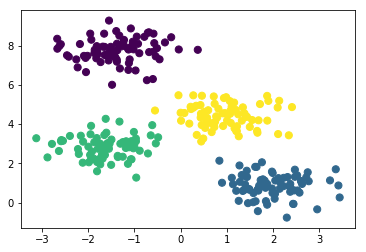

In [44]:
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap='viridis')

Now plot the centers ("centroids")

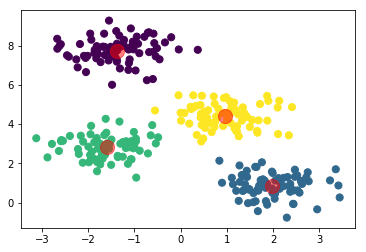

In [45]:
centers = kmeans.cluster_centers_ 
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50,cmap ='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c ='red', s = 200, alpha = 0.5) 

## Estimating Number of Clusters ##
What if we don't know how many clusters to choose?

With two-dimensional data we can use plots, with multi-dimensional data not so easy.  One option is Principle Components to reduce the dimensions.

Another method is to evaluate the "within-cluster SSE" AKA distortion.   Sum of Squared Errors is just a measure of distance from the/a center for all points.



In [46]:
 print('Distortion: %.2f' % kmeans.inertia_)

Distortion: 212.01


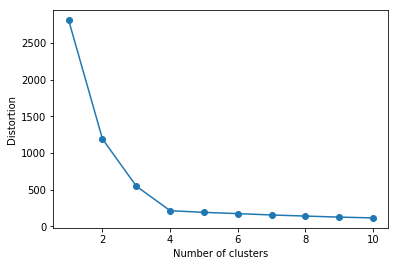

In [47]:
distortions = [] 
for i in range(1, 11): 
     km = KMeans(n_clusters = i)
     km.fit(X) 
     distortions.append(km.inertia_) 

plt.plot(range(1,11), distortions, marker='o') 
plt.xlabel('Number of clusters') 
plt.ylabel('Distortion') 
plt.show()

**4** Looks like the optimal number of clusters (we already know this).

What happens if we choose 5 clusters?



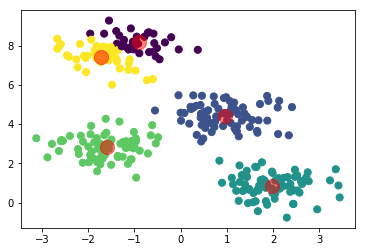

In [48]:
kmeans = KMeans(n_clusters = 5) 
kmeans.fit(X) 
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_ 
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap ='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c ='red', s = 200, alpha = 0.5) 

In [49]:
outliers = np.array( [[3,6], [2,7], [2.5,7] , [2.5,8], [3,8], [3,8.5]  ])

Xnew = np.concatenate([X,outliers])

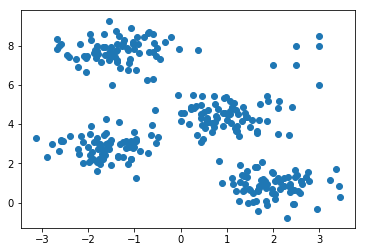

In [50]:
plt.scatter(Xnew[:, 0], Xnew[:, 1])

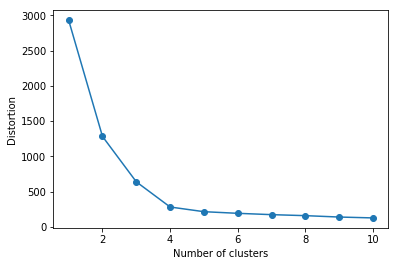

In [51]:
distortions = [] 
for i in range(1, 11): 
     km = KMeans(n_clusters = i)
     km.fit(Xnew) 
     distortions.append(km.inertia_) 

plt.plot(range(1,11), distortions, marker='o') 
plt.xlabel('Number of clusters') 
plt.ylabel('Distortion') 
plt.show()

In [53]:
distortions

[2929.175942645488,
 1283.1453142569444,
 640.0508796112456,
 283.344577432149,
 217.04766287750147,
 193.87152632985095,
 175.0816419061775,
 160.84165118616647,
 141.1405541310785,
 128.76625217281043]

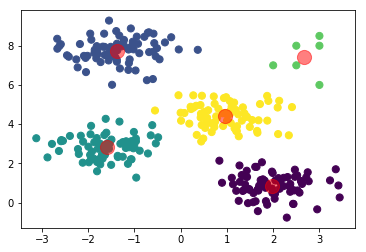

In [54]:
kmeans = KMeans(n_clusters = 5) 
kmeans.fit(Xnew) 
y_kmeans = kmeans.predict(Xnew)
centers = kmeans.cluster_centers_ 
plt.scatter(Xnew[:, 0], Xnew[:, 1], c = y_kmeans, s = 50, cmap ='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c ='red', s = 200, alpha = 0.5) 